# Import

In [2]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

  Preparing metadata (setup.py) ... done


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from zipfile import ZipFile
import glob

from sklearn.utils import resample
import scipy.stats as stats
#from google.colab import drive
#drive.mount('/content/drive')

# 1.Prepare data

In [4]:
# unzip data and load them
!unzip "drive/MyDrive/data/time-series.zip"

Archive:  drive/MyDrive/data/time-series.zip
  inflating: 4.csv                   
  inflating: 5.csv                   
  inflating: 6.csv                   
  inflating: 7.csv                   
  inflating: 8.csv                   
  inflating: 9.csv                   
  inflating: 10.csv                  
  inflating: 11.csv                  
  inflating: 12.csv                  
  inflating: 13.csv                  
  inflating: 14.csv                  
  inflating: 15.csv                  
  inflating: 16.csv                  
  inflating: 17.csv                  
  inflating: 18.csv                  
  inflating: 19.csv                  
  inflating: 20.csv                  
  inflating: 21.csv                  
  inflating: 22.csv                  
  inflating: 23.csv                  
  inflating: 24.csv                  
  inflating: 25.csv                  
  inflating: 26.csv                  
  inflating: 27.csv                  
  inflating: 28.csv                  
  inf

In [16]:
df = pd.read_csv("0.csv")
df

,timestamp,value,label
0,1493568000,1.901639,0
1,1493568060,1.786885,0
2,1493568120,2.000000,0
3,1493568180,1.885246,0
4,1493568240,1.819672,0
...,...,...,...
128557,1501475400,2.684211,0
128558,1501475460,2.526316,0
128559,1501475520,2.614035,0
128560,1501475580,2.736842,0


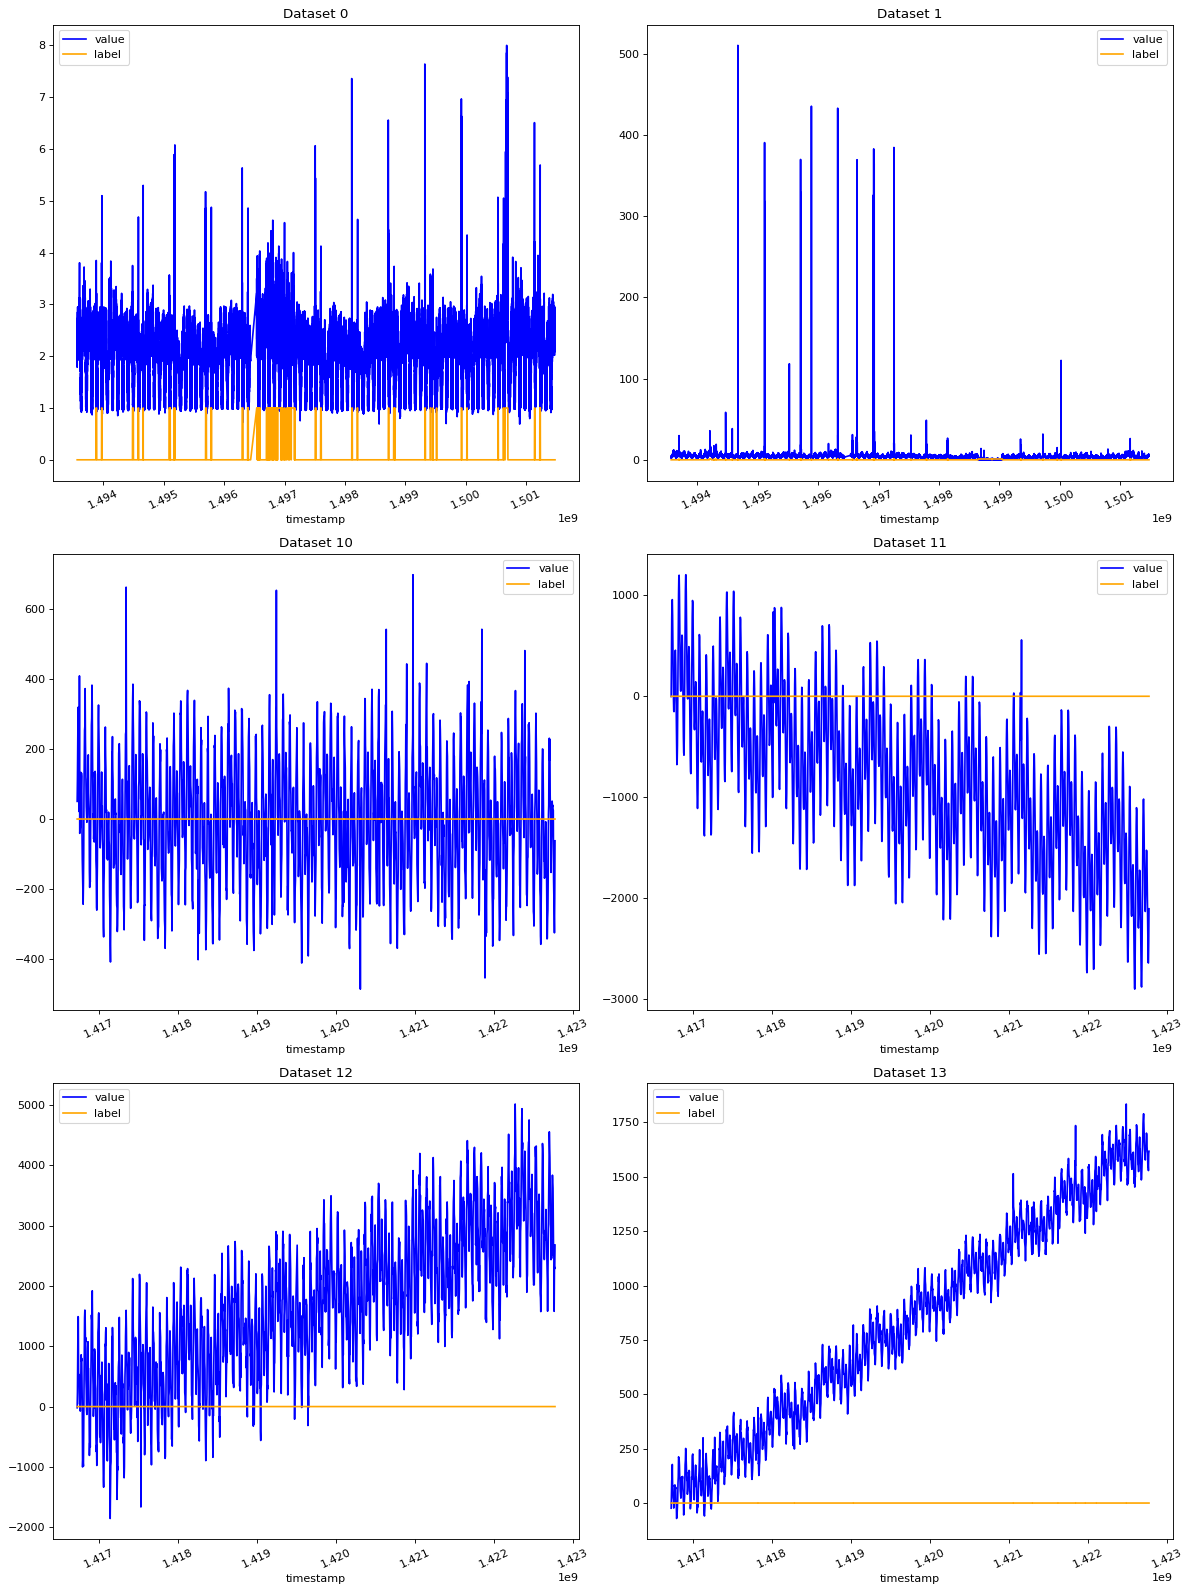

In [ ]:
# show chart of 5 dataset(csv file) randomly

csv_path = ["0.csv", "1.csv", "10.csv", "11.csv", "12.csv", "13.csv"]
dataset = []
for i in range(6):
  dataset.append(pd.read_csv(csv_path[i]))

titles = [
  "Dataset 0",
  "Dataset 1",
  "Dataset 10",
  "Dataset 11",
  "Dataset 12",
  "Dataset 13"
]

feature_keys = [
  "value",
  "label",
]

colors = [
  "blue",
  "orange",
]

date_time_key = "timestamp"

def show_raw_visualization(data):
  i = 0
  j = 0
  k = 0
  fig, axes = plt.subplots(
    nrows=3, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
  )
  for d in data:
    time_data = d[date_time_key]
    value = feature_keys[0]
    label = feature_keys[1]
    c_value = colors[0]
    c_label = colors[1]
    t_value = d[value]
    t_label = d[label]
    t_value.index = time_data
    t_value.head()
    t_label.index = time_data
    t_label.head()
    ax = t_value.plot(
      ax=axes[i, j],
      color=c_value,
      title="{}".format(titles[k]),
      rot=25,
    )
    ax = t_label.plot(
      ax=axes[i, j],
      color=c_label,
      title="{}".format(titles[k]),
      rot=25,
    )

    if (j == 0):
      j = 1

    elif (j == 1):
      j = 0
      i += 1

    k += 1
    ax.legend(feature_keys)
    plt.tight_layout()

show_raw_visualization(dataset)

In [10]:
# split data to train and test
files = sorted(glob.glob('*.csv'))
dataset = []
for f in files:
  dataset.append(pd.read_csv(f))
data = pd.concat(dataset, ignore_index=True)
x = data["value"]
x = x.values.reshape(-1, 1, 1)
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Metric functions

In [6]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Hyperparameters

In [7]:
EPOCHS = 5
BATCH_SIZE = 128

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

In [11]:
# Simple
def Simple_RNN(hidden_units, dense_units, last_units, input_shape, activation):
  model = Sequential()
  model.add(SimpleRNN(hidden_units, input_shape=input_shape))
  model.add(Dense(units=dense_units, activation=activation[0]))
  model.add(Dense(units=last_units, activation=activation[1]))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=(f1_score_m,))
  return model

simple_model = Simple_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = simple_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/5
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0796 - f1_score_m: 0.0412 - val_loss: 0.0778 - val_f1_score_m: 0.1178
Epoch 2/5
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0775 - f1_score_m: 0.1222 - val_loss: 0.0779 - val_f1_score_m: 0.1145
Epoch 3/5
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0772 - f1_score_m: 0.1278 - val_loss: 0.0774 - val_f1_score_m: 0.1319
Epoch 4/5
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0770 - f1_score_m: 0.1295 - val_loss: 0.0773 - val_f1_score_m: 0.1580
Epoch 5/5
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0769 - f1_score_m: 0.1347 - val_loss: 0.0766 - val_f1_score_m: 0.1456


In [30]:
# LSTM
def LSTM_RNN(hidden_units, dense_units, last_units, input_shape, activation):
  model = Sequential()
  model.add(LSTM(hidden_units, input_shape=input_shape))
  model.add(Dense(units=dense_units, activation=activation[0]))
  model.add(Dense(units=last_units, activation=activation[1]))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=(f1_score_m,))
  return model

lstm_model = LSTM_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = lstm_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/5
8869/8869 [==============================] - 50s 5ms/step - loss: 0.0756 - f1_score_m: 3.3718e-04 - val_loss: 0.0708 - val_f1_score_m: 0.0000e+00
Epoch 2/5
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0692 - f1_score_m: 0.0617 - val_loss: 0.0675 - val_f1_score_m: 0.0804
Epoch 3/5
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0677 - f1_score_m: 0.1105 - val_loss: 0.0685 - val_f1_score_m: 0.1176
Epoch 4/5
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0671 - f1_score_m: 0.1258 - val_loss: 0.0702 - val_f1_score_m: 0.1357
Epoch 5/5
8869/8869 [==============================] - 51s 6ms/step - loss: 0.0666 - f1_score_m: 0.1401 - val_loss: 0.0664 - val_f1_score_m: 0.1489


In [ ]:
# GRU
def GRU_RNN(hidden_units, dense_units, last_units, input_shape, activation):
  model = Sequential()
  model.add(LSTM(hidden_units, input_shape=input_shape))
  model.add(Dense(units=dense_units, activation=activation[0]))
  model.add(Dense(units=last_units, activation=activation[1]))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=(f1_score_m,))
  return model

gru_model = GRU_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = gru_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/5
8869/8869 [==============================] - 54s 6ms/step - loss: 0.0762 - f1_score_m: 7.9552e-04 - val_loss: 0.0703 - val_f1_score_m: 0.0000e+00
Epoch 2/5
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0693 - f1_score_m: 0.0226 - val_loss: 0.0681 - val_f1_score_m: 0.0809
Epoch 3/5
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0681 - f1_score_m: 0.0782 - val_loss: 0.0674 - val_f1_score_m: 0.1211
Epoch 4/5
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0676 - f1_score_m: 0.1064 - val_loss: 0.0673 - val_f1_score_m: 0.1287
Epoch 5/5
8869/8869 [==============================] - 50s 6ms/step - loss: 0.0673 - f1_score_m: 0.1190 - val_loss: 0.0685 - val_f1_score_m: 0.1319


# 4. Preprocces data to get better performance

In [12]:
# Preprocces method 1
obj = StandardScaler()
obj.fit(x_train.reshape((-1, 1)))
x_train_standard = obj.transform(x_train.reshape(-1,1))
x_test_standard = obj.transform(x_test.reshape(-1,1))

In [13]:
# Preprocces method 2
obj = MinMaxScaler()
obj.fit(x_train.reshape((-1, 1)))
x_train_standard = obj.transform(x_train_standard.reshape(-1,1)).reshape(-1,1,1)
x_test_standard = obj.transform(x_test_standard.reshape(-1,1)).reshape(-1,1,1)

In [14]:
# Train 3 models again
# Simple RNN
simple_model = Simple_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = simple_model.fit(x_train_standard, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_standard, y_test))

Epoch 1/5
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0962 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 2/5
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0944 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 3/5
8869/8869 [==============================] - 58s 7ms/step - loss: 0.0944 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 4/5
8869/8869 [==============================] - 46s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0952 - val_f1_score_m: 0.0000e+00
Epoch 5/5
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0947 - val_f1_score_m: 0.0000e+00


In [ ]:
lstm_model = LSTM_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = lstm_model.fit(x_train_standard, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_standard, y_test))

Epoch 1/5
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0976 - f1_score_m: 8.4776e-06 - val_loss: 0.0948 - val_f1_score_m: 0.0000e+00
Epoch 2/5
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 3/5
8869/8869 [==============================] - 46s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 4/5
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0950 - val_f1_score_m: 0.0000e+00
Epoch 5/5
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00


In [ ]:
gru_model = GRU_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = gru_model.fit(x_train_standard, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_standard, y_test))

Epoch 1/5
8869/8869 [==============================] - 46s 5ms/step - loss: 0.0979 - f1_score_m: 1.0097e-05 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 2/5
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 3/5
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00
Epoch 4/5
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0957 - val_f1_score_m: 0.0000e+00
Epoch 5/5
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0943 - f1_score_m: 0.0000e+00 - val_loss: 0.0946 - val_f1_score_m: 0.0000e+00


# 6. Train a self supervise model

In [17]:
x_train_pred, y_train_pred, x_test_pred, y_test_pred = [], [], [], []
x_train_flatten = x_train.flatten()
x_test_flatten = x_test.flatten()
for i in range(0, len(x_train_flatten) - 1):
  x_train_pred.append(x_train_flatten[i])
  y_train_pred.append(x_train_flatten[i + 1])
x_train_pred, y_train_pred = np.array(x_train_pred).reshape((-1, 1)), np.array(y_train_pred)
for i in range(0, len(x_test_flatten) - 1):
  x_test_pred.append(x_test_flatten[i])
  y_test_pred.append(x_test_flatten[i + 1])
x_test_pred, y_test_pred = np.array(x_test_pred).reshape((-1, 1)), np.array(y_test_pred)

In [18]:
# compile and train the model
model = keras.Sequential()
model.add(LSTM(128, input_shape=(1, 1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=(f1_score_m,))
history = simple_model.fit(x_train_pred, y_train_pred, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_pred, y_test_pred))

Epoch 1/5
8869/8869 [==============================] - 49s 5ms/step - loss: -84324472.0000 - f1_score_m: 0.9362 - val_loss: -219246336.0000 - val_f1_score_m: 0.9361
Epoch 2/5
8869/8869 [==============================] - 49s 6ms/step - loss: -427191616.0000 - f1_score_m: 0.9363 - val_loss: -702006912.0000 - val_f1_score_m: 0.9361
Epoch 3/5
8869/8869 [==============================] - 48s 5ms/step - loss: -1020992320.0000 - f1_score_m: 0.9363 - val_loss: -1437595264.0000 - val_f1_score_m: 0.9361
Epoch 4/5
8869/8869 [==============================] - 48s 5ms/step - loss: -1844427776.0000 - f1_score_m: 0.9363 - val_loss: -2412090112.0000 - val_f1_score_m: 0.9361
Epoch 5/5
8869/8869 [==============================] - 44s 5ms/step - loss: -2933946368.0000 - f1_score_m: 0.9363 - val_loss: -3648878336.0000 - val_f1_score_m: 0.9361


In [19]:
# delete last layer of model
model_fine_tune = keras.Model(inputs=model.input, outputs=model.layers[-2].output)

In [20]:
# freeze all remaining layers except the last one
for layer in model_fine_tune.layers[:-1]:
  layer.trainable = False

In [22]:
# add 2 dence layer to the model
layer1 = layers.Dense(10)(model_fine_tune.output)
layer2 = layers.Dense(1, activation='sigmoid')(layer1)
model_fine_tune = keras.Model(inputs=model_fine_tune.input, outputs=layer2)

In [26]:
# train the main task(anomaly detection)
model_fine_tune.compile(loss='mse', optimizer='adam', metrics=(f1_score_m,))
model_fine_tune.fit(x_train_pred, y_train_pred, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_pred, y_test_pred))

Epoch 1/5
8869/8869 [==============================] - 59s 6ms/step - loss: 32799528960.0000 - f1_score_m: 119.8371 - val_loss: 33574006784.0000 - val_f1_score_m: 119.7816
Epoch 2/5
8869/8869 [==============================] - 53s 6ms/step - loss: 32799551488.0000 - f1_score_m: 119.8371 - val_loss: 33574006784.0000 - val_f1_score_m: 119.7816
Epoch 3/5
8869/8869 [==============================] - 53s 6ms/step - loss: 32799512576.0000 - f1_score_m: 119.8372 - val_loss: 33574006784.0000 - val_f1_score_m: 119.7816
Epoch 4/5
8869/8869 [==============================] - 54s 6ms/step - loss: 32799510528.0000 - f1_score_m: 119.8374 - val_loss: 33574006784.0000 - val_f1_score_m: 119.7816
Epoch 5/5
8869/8869 [==============================] - 54s 6ms/step - loss: 32799627264.0000 - f1_score_m: 119.8363 - val_loss: 33574006784.0000 - val_f1_score_m: 119.7816


# 7. Handle unbalanced data problem

In [28]:
mjr = data[data["label"] == 0]
mnr = data[data["label"] == 1]

downsampled = resample(mjr, replace=True, random_state=42, n_samples=len(mnr))
upsampled = pd.concat([downsampled, mnr])

x_upsample = upsampled["value"]
x_upsample = x_upsample.values.reshape(-1, 1, 1)
y_upsample = upsampled.iloc[:, -1]
x_train_up, x_test_up, y_train_up, y_test_up = train_test_split(x_upsample, y_upsample, random_state=0)

In [31]:
lstm_model = LSTM_RNN(128, 64, 1, (1, 1), ['relu', 'sigmoid'])
history = lstm_model.fit(x_train_up, y_train_up, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test_up, y_test_up))

Epoch 1/5
338/338 [==============================] - 4s 7ms/step - loss: 0.5389 - f1_score_m: 0.7462 - val_loss: 0.4816 - val_f1_score_m: 0.7964
Epoch 2/5
338/338 [==============================] - 2s 5ms/step - loss: 0.4631 - f1_score_m: 0.8098 - val_loss: 0.4520 - val_f1_score_m: 0.8172
Epoch 3/5
338/338 [==============================] - 2s 5ms/step - loss: 0.4454 - f1_score_m: 0.8178 - val_loss: 0.4444 - val_f1_score_m: 0.8173
Epoch 4/5
338/338 [==============================] - 2s 5ms/step - loss: 0.4418 - f1_score_m: 0.8183 - val_loss: 0.4446 - val_f1_score_m: 0.8180
Epoch 5/5
338/338 [==============================] - 2s 5ms/step - loss: 0.4377 - f1_score_m: 0.8208 - val_loss: 0.4396 - val_f1_score_m: 0.8221


# 8. Statistical method for anomaly detection

In [35]:
data = pd.read_csv("0.csv")
data['z-score'] = stats.zscore(data['value'])
display(data)

,timestamp,value,label,z-score
0,1493568000,1.901639,0,-0.074118
1,1493568060,1.786885,0,-0.249654
2,1493568120,2.000000,0,0.076341
3,1493568180,1.885246,0,-0.099195
4,1493568240,1.819672,0,-0.199501
...,...,...,...,...
128557,1501475400,2.684211,0,1.122956
128558,1501475460,2.526316,0,0.881429
128559,1501475520,2.614035,0,1.015611
128560,1501475580,2.736842,0,1.203465
